# Oil Company Stock Analysis

### Some questions 

### Summarizes the analysis

### Draws correct coclusions or comparisons from the calculations

# <br> **Section 1: Dependencies**

In [1]:
 #*******************************************************************************************
 #
 #  File Name:  WeatherPy.ipynb 
 #
 #  File Description:
 #      This interactive Python notebook, PyOilStockAnalysis.ipynb, uses Python script to 
 #      analyze the relationship during a three year period, December 2019 to December 2022,
 #      between 30 oil company stocks and a variety of measures to answer a number of 
 #      questions.
 #
 #      pip install yahoo_fin      
 #      pip install requests_html 
 #
 #
 #  Date            Description                             Programmer
 #  ----------      ------------------------------------    ------------------
 #  08/12/2023      Initial Development                     Group #4 Team
 #
 #******************************************************************************************/

import OilStockProjectConstants as constant
import OilStockProjectFunctions as function
import OilStockProjectSubRoutines as subroutine

import datetime
import pandas as pds
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

# <br> **Section 2: Prepare the Data**

### **Yahoo Finance API Full Ticker Download**

In [2]:
# This function takes a full list of stock tickers without duplicates
# from the Yahoo Finance API in the categories of S&P 500, DJIA, 
# and Other.
completeStockTickerList \
    = function \
        .ReturnCompleteStockList()

In [3]:
# This print statement gives a count of the tickers in the complete List.
print('There are {:,} tickers in the complete stock ticker List.' \
      .format(len(completeStockTickerList)))

There are 11,320 tickers in the complete stock ticker List.


### **Oil Company Data Retrieval**

In [4]:
# This function returns a DataFrame of oil company tickers and their market 
# capitalization datafrom the original List (the process takes approximately 
# 45-60 minutes to complete.

#oilCompanyMarketCapUnprocessedDataFrame \
#    = function \
#        .ReturnDataFrameOfOilCompanies \
#            (completeStockTickerList)

#oilCompanyMarketCapUnprocessedDataFrame.to_csv(constant.CSV_FILE_PATH)

oilCompanyMarketCapUnprocessedDataFrame \
    = pds \
        .read_csv \
            (constant.CSV_FILE_PATH)

In [5]:
# This subroutine displays a count of the stock tickers and any redundancies 
# in the oil company market capitalization List.
subroutine \
    .DisplaySeriesCountAndRedundancies \
        (oilCompanyMarketCapUnprocessedDataFrame['Ticker'], \
         'the oil company market capitalization List')

There are now 217 stock tickers with 0 redundancies in the oil company market capitalization List.


### **Oil Company Filter**

In [6]:
# This line of code drops rows that have n/a fields.
oilCompanyMarketCapDataFrame \
    = oilCompanyMarketCapUnprocessedDataFrame \
        .dropna()

In [7]:
# This subroutine displays a count of the stock tickers and any redundancies 
# in the oil company market capitalization List without n/a fields.
subroutine \
    .DisplaySeriesCountAndRedundancies \
        (oilCompanyMarketCapDataFrame['Ticker'], \
         'the oil company market capitalization List')

There are now 217 stock tickers with 0 redundancies in the oil company market capitalization List.


In [8]:
# This line of code tallys the number of companies in each industry and display the results.
print \
    (oilCompanyMarketCapDataFrame \
         .groupby \
             ('Industry') \
                 ['Company Name'] \
         .count())

Industry
Oil & Gas Drilling                 7
Oil & Gas E&P                     80
Oil & Gas Equipment & Services    45
Oil & Gas Integrated              15
Oil & Gas Midstream               50
Oil & Gas Refining & Marketing    20
Name: Company Name, dtype: int64


In [9]:
# There is only one company in the Independent Oil & Gas industry, so the script removes 
# both that industry and its associated company.
updatedOilCompanyMarketCapDataFrame \
    = oilCompanyMarketCapDataFrame \
        [oilCompanyMarketCapDataFrame \
             ['Industry'] \
         != 'Independent Oil & Gas'].sort_values('Industry', ascending=True)

In [10]:
# These lines of code sort the DataFrame based on index then resets the index.
updatedOilCompanyMarketCapDataFrame \
    = updatedOilCompanyMarketCapDataFrame \
        .sort_index(axis=0)

updatedOilCompanyMarketCapDataFrame\
    .reset_index \
        (drop = True, 
         inplace = True)

In [11]:
# This subroutine displays a count of the stock tickers and any redundancies 
# in the oil company market capitalization List without the one industry with
# one company.
subroutine \
    .DisplaySeriesCountAndRedundancies \
        (updatedOilCompanyMarketCapDataFrame['Ticker'], \
         'the oil company market capitalization List')

There are now 217 stock tickers with 0 redundancies in the oil company market capitalization List.


### **Display Oil Company Information**

In [12]:
# This function displays the first five lines of a formatted oil company 
# market capitalization DataFrame.
function. \
    DisplayFormattedMarketCapDataFrame \
        (updatedOilCompanyMarketCapDataFrame.head(),
         'Table 2.0: Oil Companies with Market Capitalization Metrics')

Unnamed: 0,Ticker,Company Name,Industry,Market Cap (Min),Market Cap (Max),Market Cap (Mean),Market Cap (Median)
0,AE,"Adams Resources & Energy, Inc.",Oil & Gas Refining & Marketing,"$36,605,281.88","$147,901,279.96","$124,215,658.37","$132,717,409.52"
1,AM,Antero Midstream Corporation,Oil & Gas Midstream,"$615,416,177.28","$2,308,098,163.95","$1,334,721,889.33","$1,352,087,609.62"
2,AMPY,Amplify Energy Corp.,Oil & Gas E&P,"$19,756,359.28","$357,886,373.15","$125,190,190.48","$141,705,791.87"
3,AMTX,"Aemetis, Inc.",Oil & Gas Refining & Marketing,"$12,552,562.13","$30,073,765.84","$18,986,014.03","$17,980,279.31"
4,APA,APA Corporation,Oil & Gas E&P,"$1,390,683,856.94","$12,003,805,528.28","$6,279,797,688.22","$3,894,152,356.05"


# <br> **Section 3: Oil Industry Market Capitalization Mean/Median Analysis**

### **Mean/Median Statistical Calculations**

In [13]:
# This function returns the mean market capitalization by industry summary statistics 
# in a DataFrame.
meanMarketCapByIndustrySummaryStatisticsDataFrame \
    = function \
        .ReturnIndustryMarketCapStatisticsSummary \
            (updatedOilCompanyMarketCapDataFrame,
             'Market Cap (Mean)')

In [14]:
# This function returns the median market capitalization by industry summary statistics 
# in a DataFrame.
medianMarketCapByIndustrySummaryStatisticsDataFrame \
    = function \
        .ReturnIndustryMarketCapStatisticsSummary \
            (updatedOilCompanyMarketCapDataFrame,
             'Market Cap (Median)')

### **Display Market Capitalization (Mean) Summary Statistics**

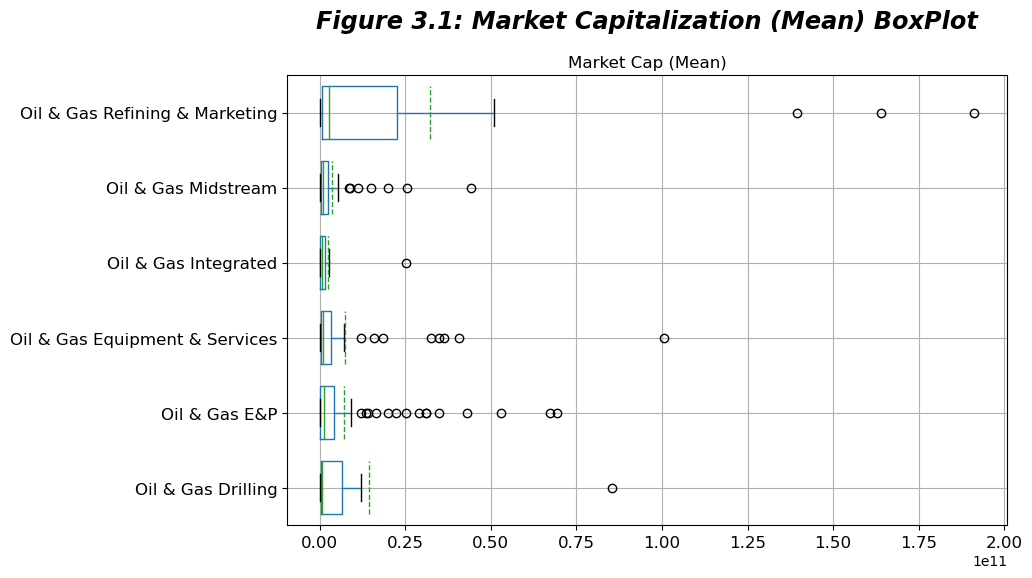

In [15]:
# This subroutine displays the mean market capitalization by industry summary statistics
# as a boxplot.
subroutine. \
    DisplaySummaryStatisticsBoxPlot \
        (updatedOilCompanyMarketCapDataFrame, \
         'Market Cap (Mean)', \
         'Figure 3.1: Market Capitalization (Mean) BoxPlot')

In [16]:
# This function displays the mean market capitalization by industry summary statistics DataFrame.
function \
    .DisplaySummaryStatistics \
        (meanMarketCapByIndustrySummaryStatisticsDataFrame, 
         'Table 3.1: Oil Industry Market (Mean) Cap Summary Statistics')

Industry,Lower Quartile,Upper Quartile,Interquartile Range,Lower Boundary,Upper Boundary,Mean,Median,% Difference,Number of Companies,Number of Outliers
Oil & Gas Drilling,"$367,425,484","$6,530,006,917","$6,162,581,433","$-8,876,446,665","$9,611,297,633","$14,302,224,805","$745,360,310",0.95%,7,2
Oil & Gas E&P,"$173,852,312","$4,233,173,135","$4,059,320,823","$-5,915,128,923","$6,262,833,547","$7,152,546,733","$1,081,413,406",0.85%,80,19
Oil & Gas Equipment & Services,"$273,563,287","$3,125,020,894","$2,851,457,608","$-4,003,623,125","$4,550,749,698","$7,440,998,638","$895,291,496",0.88%,45,10
Oil & Gas Integrated,"$144,201,093","$1,425,608,284","$1,281,407,191","$-1,777,909,693","$2,066,311,880","$2,475,325,675","$756,360,608",0.69%,15,3
Oil & Gas Midstream,"$259,036,617","$2,354,678,758","$2,095,642,142","$-2,884,426,595","$3,402,499,829","$3,675,540,786","$929,128,156",0.75%,50,10
Oil & Gas Refining & Marketing,"$782,616,815","$22,622,948,797","$21,840,331,982","$-31,977,881,158","$33,543,114,788","$32,314,045,542","$2,644,658,737",0.92%,20,5


### **Display Market Capitalization (Median) Summary Statistics**

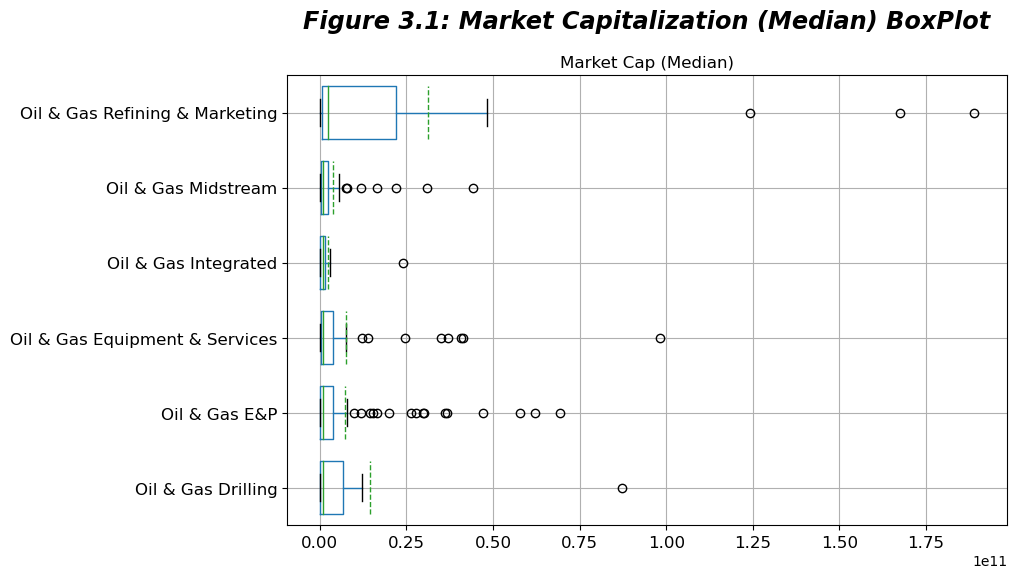

In [17]:
# This subroutine displays the median market capitalization by industry summary statistics
# as a boxplot.
subroutine. \
    DisplaySummaryStatisticsBoxPlot \
        (updatedOilCompanyMarketCapDataFrame, \
         'Market Cap (Median)', \
         'Figure 3.1: Market Capitalization (Median) BoxPlot')

In [18]:
# This function displays the median market capitalization by industry summary statistics DataFrame.
function \
    .DisplaySummaryStatistics \
        (medianMarketCapByIndustrySummaryStatisticsDataFrame, 
         'Table 3.2: Oil Industry Market Cap (Median) Summary Statistics')

Industry,Lower Quartile,Upper Quartile,Interquartile Range,Lower Boundary,Upper Boundary,Mean,Median,% Difference,Number of Companies,Number of Outliers
Oil & Gas Drilling,"$82,744,600","$6,632,966,287","$6,550,221,688","$-9,742,587,932","$9,908,077,131","$14,512,095,434","$939,020,490",0.94%,7,2
Oil & Gas E&P,"$116,320,030","$3,784,176,987","$3,667,856,957","$-5,385,465,405","$5,618,105,465","$7,249,126,385","$908,236,463",0.87%,80,18
Oil & Gas Equipment & Services,"$249,560,090","$3,697,792,275","$3,448,232,186","$-4,922,788,188","$5,421,908,368","$7,660,659,078","$907,496,714",0.88%,45,10
Oil & Gas Integrated,"$153,872,488","$1,444,907,407","$1,291,034,919","$-1,782,679,891","$2,090,424,867","$2,432,552,869","$828,238,618",0.66%,15,3
Oil & Gas Midstream,"$222,662,709","$2,477,910,366","$2,255,247,657","$-3,160,208,776","$3,605,534,195","$3,823,550,743","$918,705,467",0.76%,50,10
Oil & Gas Refining & Marketing,"$762,162,139","$21,849,590,859","$21,087,428,720","$-30,868,980,942","$32,393,305,219","$31,319,216,773","$2,281,841,367",0.93%,20,5


# <br> **Section 4: Oil Industry Stock Index**

### **Oil Energy Sector Breakdown by Industry (Count vs. Market Capitalization)**

In [19]:
# These lines of code create a Series with the percentage of each industry by count.
industryCountSeries \
    = updatedOilCompanyMarketCapDataFrame \
        .groupby \
            ('Industry') \
                ['Ticker'] \
        .count()

totalCompaniesInSectorIntegerVariable \
    = industryCountSeries \
        .sum()

industryPercentSeries \
    =  (industryCountSeries \
            .astype(float) 
        / float \
            (totalCompaniesInSectorIntegerVariable)) \
       *100

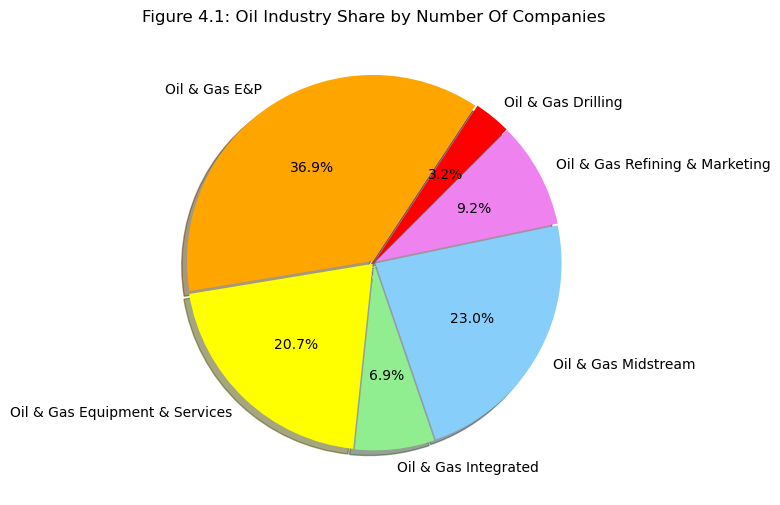

In [20]:
# This function displays the proportion of each industry by the number of companies.
function. \
    DisplayOilIndustryPieChart \
        (industryPercentSeries, 
         'Figure 4.1: Oil Industry Share by Number Of Companies')

In [21]:
# These lines of code create a Series with the percentage of each industry by sum 
# of median market capitalization.
industrySumOfMedianMarketCapsSeries \
    = updatedOilCompanyMarketCapDataFrame \
        .groupby \
            ('Industry') \
                ['Market Cap (Median)'] \
        .sum()

totalMarketCapInSectorIntegerVariable \
    = industrySumOfMedianMarketCapsSeries \
        .sum()

totalMarketCapPerIndustryPercentSeries \
    = (industrySumOfMedianMarketCapsSeries \
           .astype(float) \
       / totalMarketCapInSectorIntegerVariable) \
      *100

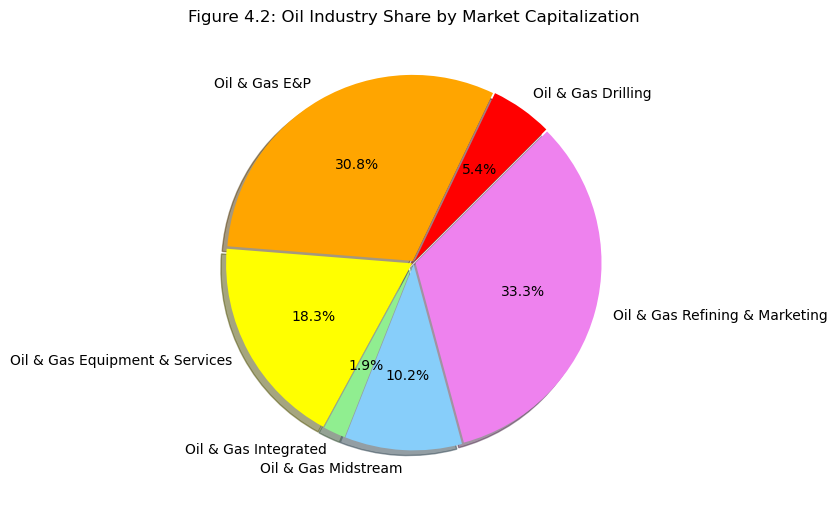

In [22]:
# This function displays the proportion of each industry by the number of companies.
function. \
    DisplayOilIndustryPieChart \
        (totalMarketCapPerIndustryPercentSeries, 
         'Figure 4.2: Oil Industry Share by Market Capitalization')

### **Oil Energy Sector Market Index from Leading Oil Companies**

In [23]:
# This function determines the top company in each industry by median market
# capitalization and its market index weight.
topOilCompaniesDataFrame \
    = function. \
        ReturnTopCompanyByIndustry \
            (updatedOilCompanyMarketCapDataFrame, \
             'Market Cap (Median)')

In [24]:
# This function displays the top six companies with their market index weights.
function. \
    DisplayFormattedLeadingOilCompanyIndexWeights \
        (topOilCompaniesDataFrame,
         'Figure 4.3: Top Oil Company Index Weights')

Ticker,Company Name,Industry,Market Cap (Median),Index Weight
BORR,Borr Drilling Limited,Oil & Gas Drilling,"$87,178,094,523",0.17
EGY,"VAALCO Energy, Inc.",Oil & Gas E&P,"$69,260,328,971",0.14
TS,Tenaris S.A.,Oil & Gas Equipment & Services,"$98,295,637,058",0.19
E,Eni S.p.A.,Oil & Gas Integrated,"$24,072,905,925",0.05
TRMD,TORM plc,Oil & Gas Midstream,"$44,104,612,153",0.09
WKC,World Kinect Corporation,Oil & Gas Refining & Marketing,"$188,960,553,552",0.37


In [25]:
# This function creates a Series containing prices for an oil energy sector market 
# index using historical oil company stock prices during the period in question 
# and the weights from median market capitalizations.
oilMarketIndexByTopCompaniesSeries \
    = function \
        .ReturnOilSectorMarketIndexSeries \
            (topOilCompaniesDataFrame['Ticker'] \
                .tolist(), \
             topOilCompaniesDataFrame['Index Weight'] \
                .tolist())

Begin calculating oil company stock index Series...

The calculation of the oil company stock index Series is complete.



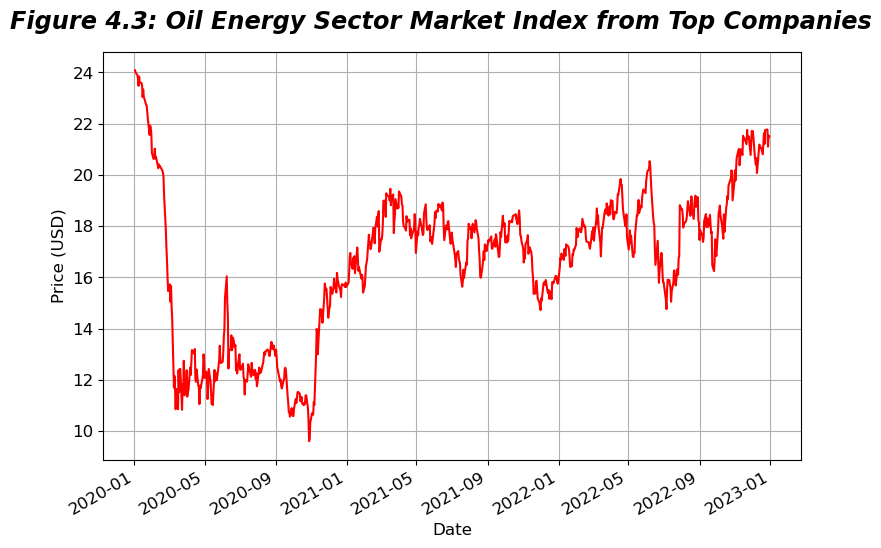

In [26]:
# This subroutine displays the oil energy sector market index based on median market 
# capitalization from the top companies.
subroutine. \
    DisplayOneLineGraph \
    (oilMarketIndexByTopCompaniesSeries,
     'red',
     'Figure 4.3: Oil Energy Sector Market Index from Top Companies')

### **Oil Energy Sector Market Index from All Oil Companies**

In [27]:
# These lines of code create index weights for all the companies in the oil 
# energy sector.
totalMedianMarketCapForSectorIntegerVariable \
    = updatedOilCompanyMarketCapDataFrame \
         ['Market Cap (Median)'] \
            .sum()

companyIndexWeightsSeries \
    = (updatedOilCompanyMarketCapDataFrame \
         ['Market Cap (Median)'] \
       / totalMedianMarketCapForSectorIntegerVariable)

In [28]:
# This function creates a Series containing index prices for the Oil Energy 
# Sector using historical oil company stock prices per day during the period 
# in question and the weights from median market capitalizations.
oilMarketIndexByAllCompaniesSeries \
    = function \
        .ReturnOilSectorMarketIndexSeries \
            (updatedOilCompanyMarketCapDataFrame['Ticker'] \
                 .unique() \
                 .tolist(), \
                 companyIndexWeightsSeries.tolist())

Begin calculating oil company stock index Series...

The calculation of the oil company stock index Series is complete.



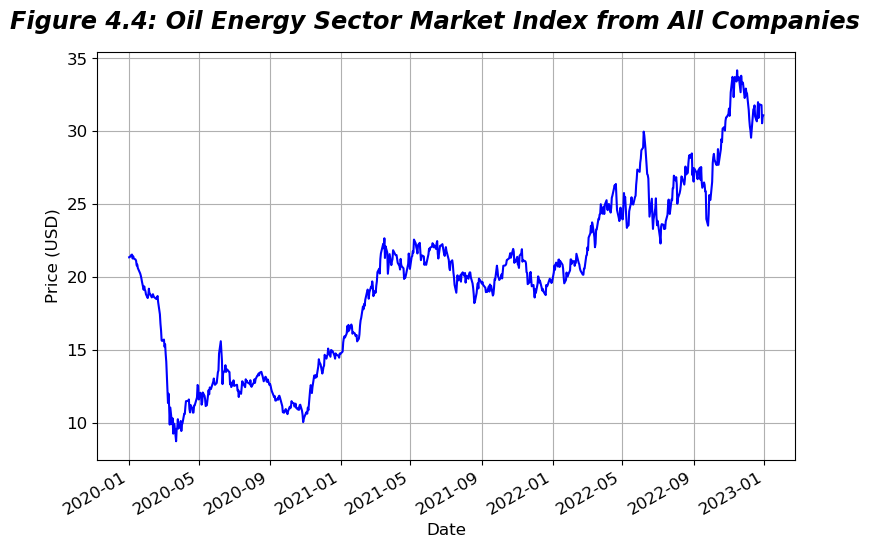

In [29]:
# This function displays the oil energy sector market index based on median market 
# capitalization from all the oil companies.
oilMarketIndexByAllCompaniesSeries \
    .rename \
        ('All Companies', 
         inplace = True)

subroutine. \
    DisplayOneLineGraph \
    (oilMarketIndexByAllCompaniesSeries,
     'blue',
     'Figure 4.4: Oil Energy Sector Market Index from All Companies')

### **Top Companies vs. All Companies in the Oil Energy Sector**

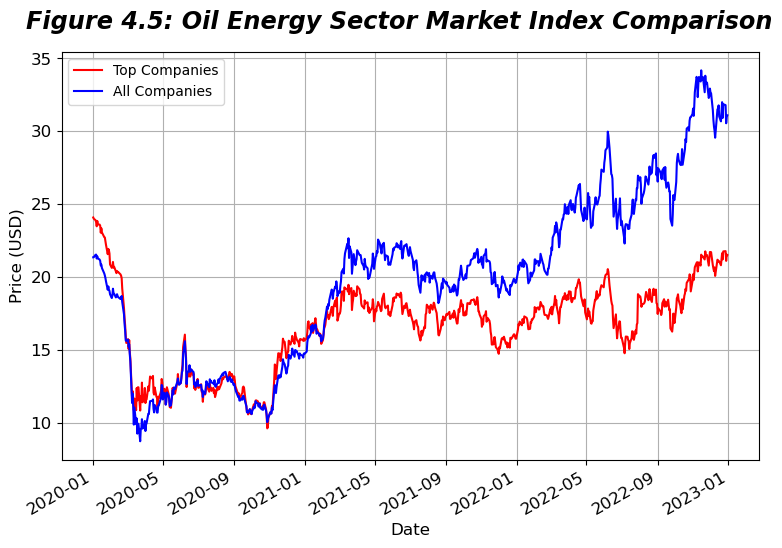

In [30]:
# These lines of code display both oil energy sector indices.
frameDictionary \
        = {'Top Companies': 
               oilMarketIndexByTopCompaniesSeries, 
           'All Companies': 
               oilMarketIndexByAllCompaniesSeries}

colorDictionary \
    = { 'red', 
        'blue'}


subroutine. \
    DisplayLinesGraph \
        (frameDictionary,
         colorDictionary,
         'Figure 4.5: Oil Energy Sector Market Index Comparison')

### **Top Companies vs. All Companies vs. the S&P 500**

In [31]:
# This function creates a Series containing prices for a the S&P 500.
sp500Series \
    = function. \
        ReturnHistoricalPricesSeries('^GSPC')

sp500Series.to_csv('./Resources/newCOVID.csv')

In [32]:
# These functions convert the Series values from prices to percent changes
oilMarketPercentTopSeries \
    = function \
        .ConvertValuesToPercentChange \
            (oilMarketIndexByTopCompaniesSeries)

oilMarketPercentAllSeries \
    = function \
        .ConvertValuesToPercentChange \
            (oilMarketIndexByAllCompaniesSeries)

sp500Series \
    .rename \
        ('All Companies', 
         inplace = True)

sp500PercentSeries \
    = function \
        .ConvertValuesToPercentChange \
            (sp500Series)

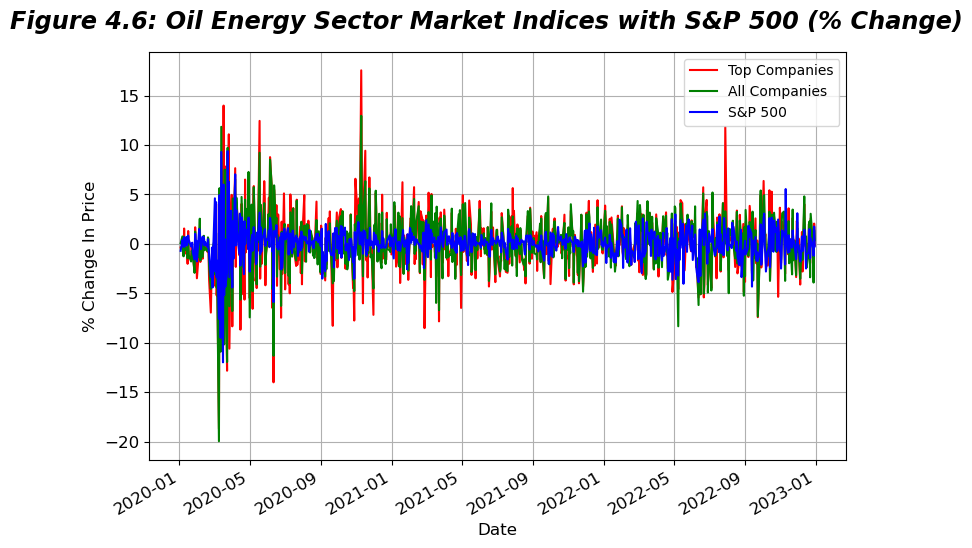

In [33]:
# These lines of code display the percent changes in the two oil energy sector indices
# with the S&P 500.
frameDictionary \
        = {'Top Companies': 
                oilMarketPercentTopSeries, 
           'All Companies': 
                oilMarketPercentAllSeries,
           'S&P 500':
                sp500PercentSeries}

colorDictionary \
    = { 'red', 
        'blue',
        'green'}


subroutine. \
    DisplayLinesGraph \
        (frameDictionary,
         colorDictionary,
         'Figure 4.6: Oil Energy Sector Market Indices with S&P 500 (% Change)',
         True)

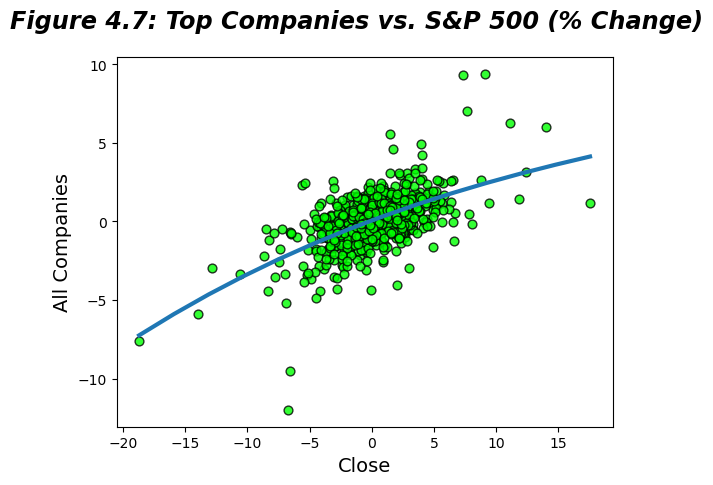

equation:             3            2
4.241e-05 x - 0.004336 x + 0.2946 x + 0.06659

r-value:      0.57977
r-squared:    0.33613
correlation:  0.57564


In [34]:
# This subroutine calculates a regression line through the scatter plot and displays both
# for top oil companies vs. the S&P 500.
subroutine \
    .DisplayScatterPlot \
        (oilMarketPercentTopSeries, \
         sp500PercentSeries, 
         'Figure 4.7: Top Companies vs. S&P 500 (% Change)')

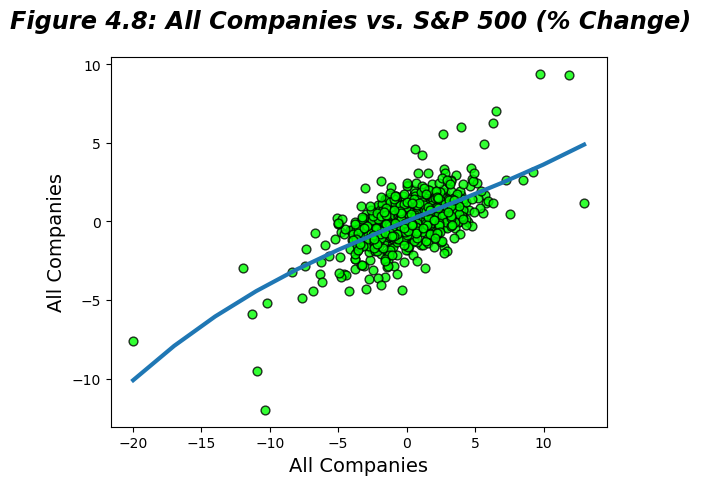

equation:             3            2
0.0003058 x - 0.001828 x + 0.3482 x + 0.02109

r-value:      0.64344
r-squared:    0.41402
correlation:  0.63962


In [35]:
# This subroutine calculates a regression line through the scatter plot and displays both
# for all oil companies vs. the S&P 500.
subroutine \
    .DisplayScatterPlot \
        (oilMarketPercentAllSeries, \
         sp500PercentSeries, 
         'Figure 4.8: All Companies vs. S&P 500 (% Change)')

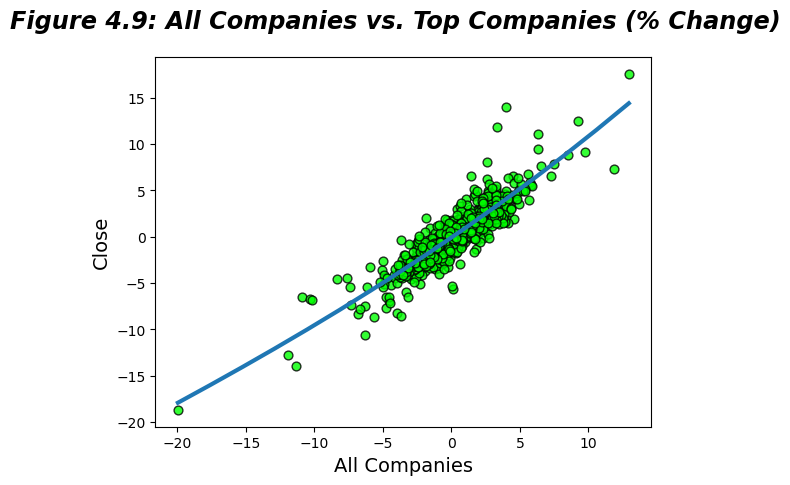

equation:             3            2
7.086e-05 x + 0.007377 x + 1.012 x - 0.1118

r-value:      0.89597
r-squared:    0.80276
correlation:  0.89480


In [36]:
# This subroutine calculates a regression line through the scatter plot and displays both
# for all oil companies vs. the S&P 500.
subroutine \
    .DisplayScatterPlot \
        (oilMarketPercentAllSeries, \
         oilMarketPercentTopSeries, 
         'Figure 4.9: All Companies vs. Top Companies (% Change)')

# <br> **Section 5: Analysis of the Effects of Various Factors on the Oil Industry**

### **Data Acquisition**

In [37]:
# This function downloads prices for crude oil.
crudeOilPricesSeries \
    = function \
        .ReturnHistoricalPricesSeries('CL=F')

In [38]:
# This function downloads prices for gold.
goldPricesSeries \
    = function \
        .ReturnHistoricalPricesSeries('GC=F')

In [39]:
# This function downloads prices for 10-Year Bonds.
tenYearBondsPricesSeries \
    = function \
        .ReturnHistoricalPricesSeries('^TNX')

In [40]:
# This function downloads prices for Bitcoin.
bitcoinSeries \
    = function \
        .ReturnHistoricalPricesSeries('BTC-USD')

In [41]:
# This function downloads new case numbers for COVID.
covidNewCasesSeries \
    = function \
        .ReturnCovidNewCasesSeries() 

In [42]:
# This function downloads new death numbers for COVID.
covidNewDeathsSeries \
    = function \
        .ReturnCovidNewDeathsSeries() 

### **Data Conversion**

In [43]:
covidNewCasesPercentSeries \
    = function \
        .ConvertValuesToPercentChange \
            (covidNewCasesSeries)

covidNewDeathsPercentSeries \
    = function \
        .ConvertValuesToPercentChange \
            (covidNewDeathsSeries)

crudeOilPricesPercentSeries \
    = function \
        .ConvertValuesToPercentChange \
            (crudeOilPricesSeries)

tenYearBondsPricesPercentSeries \
    = function \
        .ConvertValuesToPercentChange \
            (tenYearBondsPricesSeries)

bitcoinPercentSeries \
    = function \
        .ConvertValuesToPercentChange \
            (bitcoinSeries)

goldPricesPercentSeries \
    = function \
        .ConvertValuesToPercentChange \
            (goldPricesSeries)

## **Section 5.1: Covid Cases**

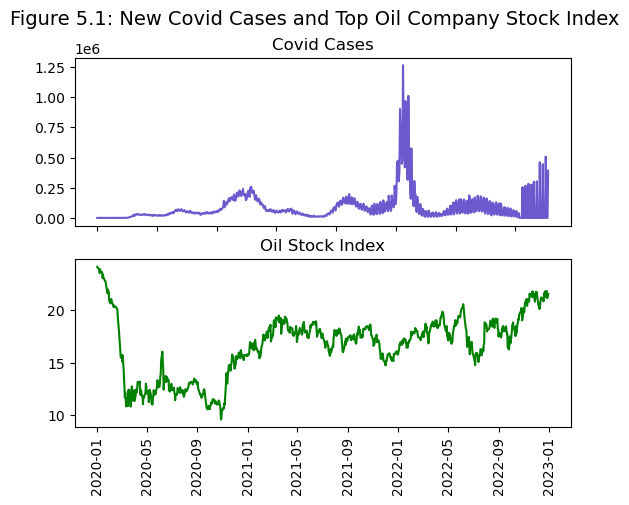

In [44]:
# This subroutine displays a two stacked subplots of Covid cases and the oil stock index.
covidNewCasesSeries \
    .rename \
        ('Covid Cases', 
          inplace \
                = True)

oilMarketIndexByTopCompaniesSeries \
    .rename \
        ('Oil Stock Index', 
         inplace \
             = True)

subroutine \
    .DisplayTwoSubPlots \
        (covidNewCasesSeries, 
         oilMarketIndexByTopCompaniesSeries, 
         'Figure 5.1: New Covid Cases and Top Oil Company Stock Index')

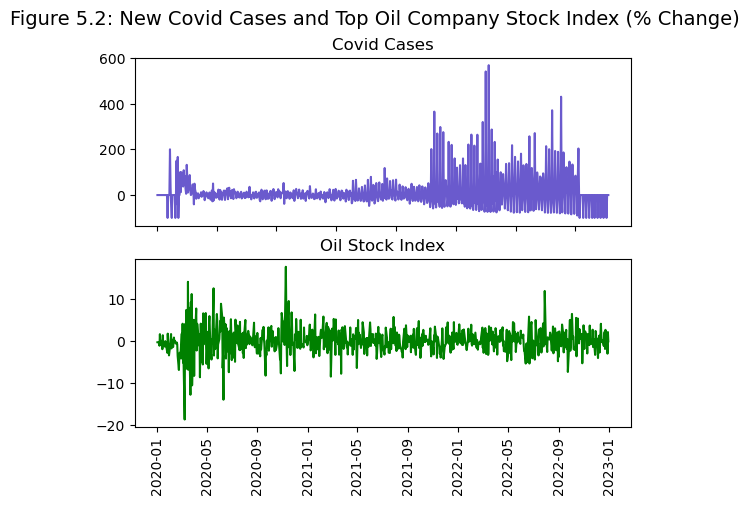

In [45]:
# This subroutine displays a two stacked subplots of percent changes in Covid cases 
# and the oil stock index.
covidNewCasesPercentSeries \
    .rename \
        ('Covid Cases', 
         inplace \
             = True)

oilMarketPercentTopSeries \
    .rename \
        ('Oil Stock Index', 
         inplace \
             = True)

subroutine \
    .DisplayTwoSubPlots \
        (covidNewCasesPercentSeries, 
         oilMarketPercentTopSeries, 
         'Figure 5.2: New Covid Cases and Top Oil Company Stock Index (% Change)')

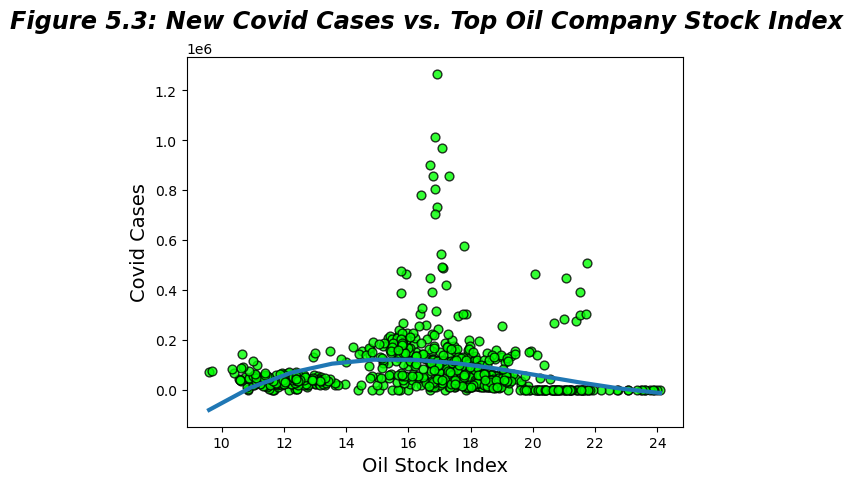

equation:         3             2
281.1 x - 1.729e+04 x + 3.33e+05 x - 1.933e+06

r-value:      0.27387
r-squared:    0.07500
correlation:  nan


In [46]:
# This subroutine calculates a regression line through the scatter plot and displays
# the relationship between the top oil companies vs. the new covid cases.
subroutine \
    .DisplayScatterPlot \
        (oilMarketIndexByTopCompaniesSeries,
         covidNewCasesSeries,
         'Figure 5.3: New Covid Cases vs. Top Oil Company Stock Index')

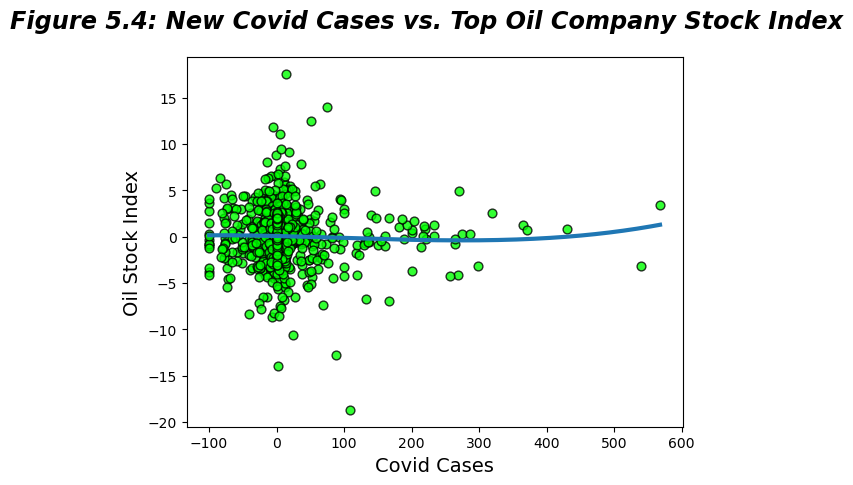

equation:             3             2
2.337e-08 x - 6.563e-06 x - 0.001676 x + 0.05819

r-value:      0.03802
r-squared:    0.00145
correlation:  nan


In [47]:
# This subroutine calculates a regression line through the scatter plot and displays
# the relationship between the top oil companies vs. the new covid cases.
subroutine \
    .DisplayScatterPlot \
        (covidNewCasesPercentSeries, 
         oilMarketPercentTopSeries, 
         'Figure 5.4: New Covid Cases vs. Top Oil Company Stock Index')

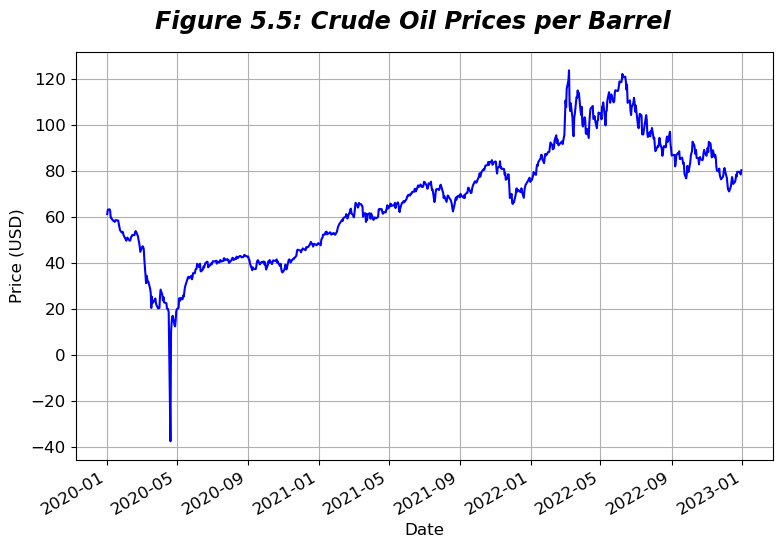

In [50]:
# This function displays the oil energy sector market index based on median market 
# capitalization from all the oil companies.
crudeOilPricesSeries \
    .rename \
        ('Crude Oil Prices', 
         inplace = True)

subroutine. \
    DisplayOneLineGraph \
    (crudeOilPricesSeries,
     'blue',
     'Figure 5.5: Crude Oil Prices per Barrel')

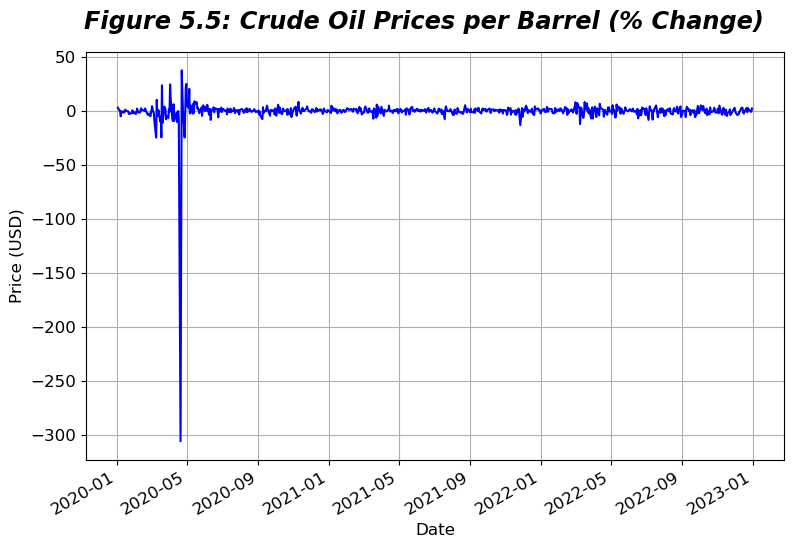

In [52]:
# This function displays the oil energy sector market index based on median market 
# capitalization from all the oil companies.
crudeOilPricesSeries \
    .rename \
        ('Crude Oil Prices', 
         inplace = True)

subroutine. \
    DisplayOneLineGraph \
    (crudeOilPricesPercentSeries,
     'blue',
     'Figure 5.6: Crude Oil Prices per Barrel (% Change)')

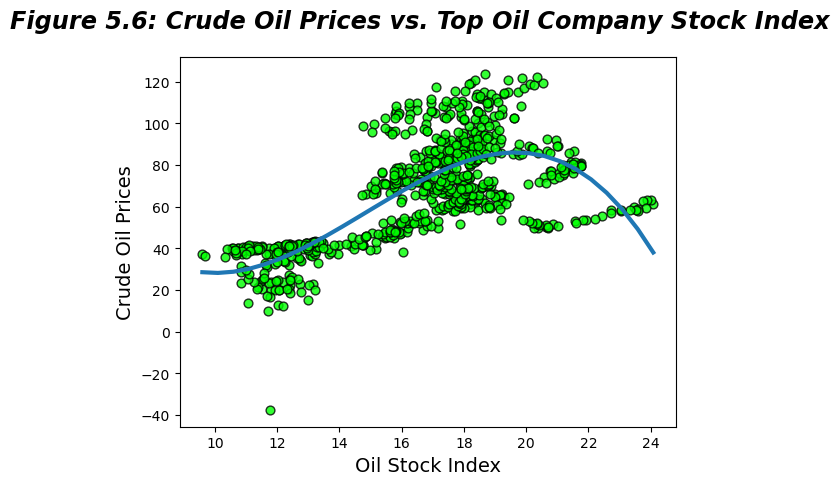

equation:           3         2
-0.1298 x + 5.781 x - 76.78 x + 347.7

r-value:      0.75697
r-squared:    0.57300
correlation:  0.64461


In [54]:
# This subroutine calculates a regression line through the scatter plot and displays
# the relationship between the top oil companies vs. the new covid cases.
subroutine \
    .DisplayScatterPlot \
        (oilMarketIndexByTopCompaniesSeries,
         crudeOilPricesSeries,
         'Figure 5.6: Crude Oil Prices vs. Top Oil Company Stock Index')

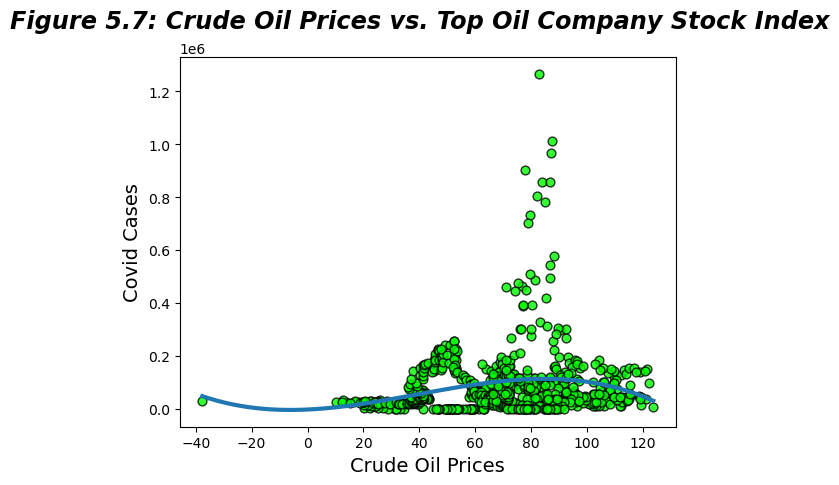

equation:           3         2
-0.3121 x + 36.81 x + 488.5 x - 2335

r-value:      0.21240
r-squared:    0.04511
correlation:  nan


In [63]:
# This subroutine calculates a regression line through the scatter plot and displays
# the relationship between the top oil companies vs. the new covid cases.
subroutine \
    .DisplayScatterPlot \
        (crudeOilPricesSeries,
         covidNewCasesSeries,
         'Figure 5.7: Crude Oil Prices vs. New Covid Cases')